In [3]:
import kagglehub

path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 775M/775M [00:05<00:00, 162MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [15]:
import os

base_path = "/kaggle/input/dog-and-cat-classification-dataset"
for root, dirs, files in os.walk(path):
    print(root)


/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1
/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages
/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Cat
/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1/PetImages/Dog


In [16]:
path

'/root/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1'

In [55]:
from PIL import Image
import os

def check_images(directory):
    for root, _, files in os.walk(directory):
        for fname in files:
            path = os.path.join(root, fname)
            try:
                img = Image.open(path)
                img.verify()
            except Exception as e:
                print(f"Removing broken image: {path}")
                os.remove(path)
base_dir=path+"/PetImages"
check_images(base_dir)


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [53]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [57]:
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras import regularizers

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.05),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.05),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[early_stop]
)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 265ms/step - accuracy: 0.5895 - loss: 1.9327 - val_accuracy: 0.6741 - val_loss: 0.5949
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.6714 - loss: 0.6044 - val_accuracy: 0.6691 - val_loss: 0.6691
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.7004 - loss: 0.5739 - val_accuracy: 0.6192 - val_loss: 0.6306
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 261ms/step - accuracy: 0.7329 - loss: 0.5341 - val_accuracy: 0.7053 - val_loss: 0.5544
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.7626 - loss: 0.4954 - val_accuracy: 0.7743 - val_loss: 0.5053
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.7911 - loss: 0.4531 - val_accuracy: 0.5472 - val_loss: 1.8267
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.8034 - loss: 0.4402 - val_accuracy: 0.6457 - val_loss: 0.7868
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 263ms/step - accuracy: 0.8265 -

In [98]:
image_path_cat="/content/cat1.jpg"
image_path_dog="/content/dogtry.jpeg"

In [ ]:
print(1)

In [99]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

augment_gen = ImageDataGenerator(
    rescale=1./255,
)

def augment_single_image(image_path, target_size=(150, 150)):

    img = load_img(image_path, target_size=target_size)  # output shape: (150, 150, 3)

    img_array = img_to_array(img)  # shape: (150, 150, 3)

    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 150, 150, 3)

    aug_iter = augment_gen.flow(img_array, batch_size=1)
    aug_img = next(aug_iter)  # shape: (1, 150, 150, 3)

    return aug_img

aug_img = augment_single_image(image_path_cat)  # shape: (1, 150, 150, 3)
prediction = model.predict(aug_img)
print(prediction[0][0])
print("Prediction:", "Dog" if prediction[0][0] > 0.65 else "Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
0.6166884
Prediction: Cat


In [91]:
model.save('cat_dog_classifier.h5')

In [92]:
from google.colab import files
files.download('cat_dog_classifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [94]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,985,605 (244.09 MB)

 Trainable params: 21,328,385 (81.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 42,656,772 (162.72 MB)

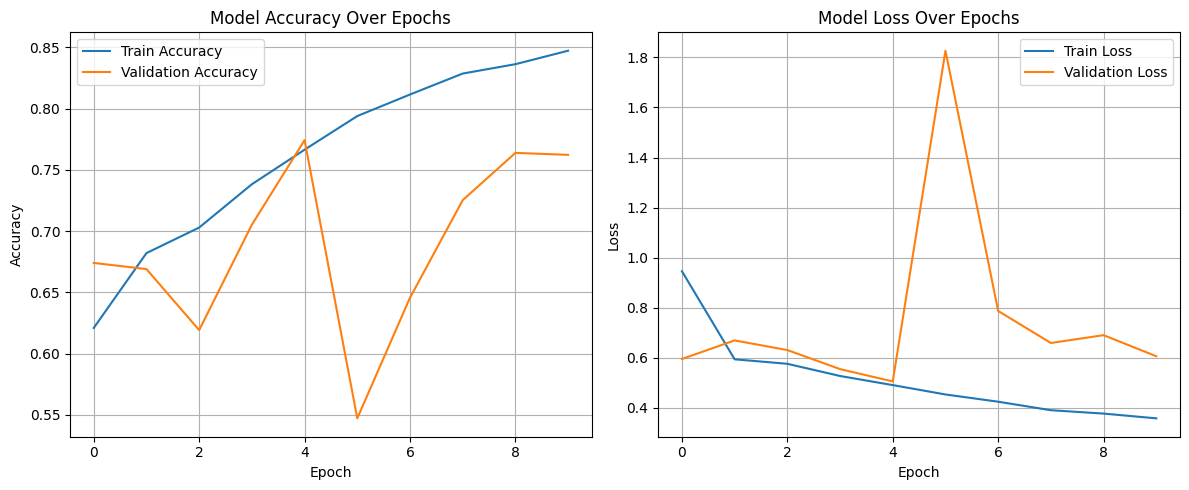

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()